In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data.xlsx')
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix

In [7]:
poor_annual_income = df[df['Credit_Score']==0]["Annual_Income"].mean()
standard_annual_income = df[df['Credit_Score']==1]["Annual_Income"].mean()
good_annual_income = df[df['Credit_Score']==2]["Annual_Income"].mean()

In [8]:
poor_annual_income, standard_annual_income, good_annual_income

(39988.98762493993, 52304.88232858779, 65219.91050965423)

In [9]:
profit_matrix = np.array([[3.26*poor_annual_income,0.65*poor_annual_income,-1.91*poor_annual_income],
                        [1.73*standard_annual_income,3.71*standard_annual_income,0.66*standard_annual_income],
                        [0.24*good_annual_income,0.67*good_annual_income,2.49*good_annual_income]])

In [10]:
def custom_score_function(y_true, y_pred):
    score = (confusion_matrix(y_true, y_pred)*profit_matrix).sum()
    return score

In [11]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier(class_weight="balanced", n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130, 170, 210], 
              'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17, 21, 26, 31]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(custom_score_function, greater_is_better=True))

In [12]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001E58834E890>),
                                       ('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1))]),
             param_grid={'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130,
                                            170, 210],
                         'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17,
                                                   21, 26, 31]},
             scoring=make_scorer(custom_score_function))

In [13]:
model_gsv.best_params_

{'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1}

In [14]:
y_pred = model_gsv.predict(X)

In [15]:
confusion_matrix(y,y_pred)

array([[3953,  149,   60],
       [ 142, 5826,  143],
       [  10,   90, 2127]], dtype=int64)

In [16]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_rfc__max_depth', 'param_rfc__min_samples_leaf',  'mean_test_score', 'rank_test_score']]
result

,param_rfc__max_depth,param_rfc__min_samples_leaf,mean_test_score,rank_test_score
0,2,1,6.216793e+08,131
1,2,2,6.217315e+08,130
2,2,3,6.337000e+08,122
3,2,4,6.301913e+08,128
4,2,5,6.302851e+08,127
...,...,...,...,...
127,210,13,6.600673e+08,62
128,210,17,6.593181e+08,74
129,210,21,6.576904e+08,98
130,210,26,6.571132e+08,104


Text(0, 0.5, 'min_samples_leaf')

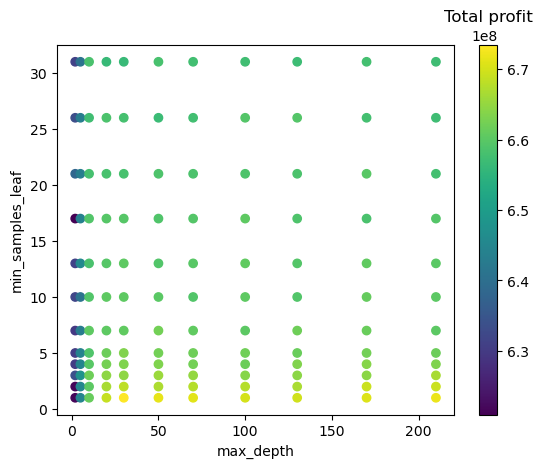

In [17]:
plt.scatter(x=result['param_rfc__max_depth'],y=result['param_rfc__min_samples_leaf'],c=result['mean_test_score'])
clb=plt.colorbar()
clb.ax.set_title('Total profit')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

In [18]:
y_pred_proba = model_gsv.predict_proba(X)

In [19]:
final_df = pd.DataFrame(y_pred_proba, columns=["Poor Proba","Standard Proba","Good Proba"])
final_df["Prediction"] = y_pred
final_df["Label"] = y
final_df["Annual Income"] = X["Annual_Income"]
final_df["Calibrated Proba for Good"] = final_df["Good Proba"]+final_df["Standard Proba"]*0.5+final_df["Poor Proba"]*0
final_df

,Poor Proba,Standard Proba,Good Proba,Prediction,Label,Annual Income,Calibrated Proba for Good
0,0.90000,0.100000,0.000000,0,0,30625.940,0.050000
1,0.01000,0.990000,0.000000,1,1,52312.680,0.495000
2,0.72000,0.140000,0.140000,0,0,113781.390,0.210000
3,0.05000,0.890000,0.060000,1,1,58918.470,0.505000
4,0.02982,0.714261,0.255919,1,1,98620.980,0.613049
...,...,...,...,...,...,...,...
12495,0.10000,0.790000,0.110000,1,1,17032.785,0.505000
12496,0.04000,0.960000,0.000000,1,1,25546.260,0.480000
12497,0.13000,0.800000,0.070000,1,1,117639.920,0.470000
12498,0.88000,0.120000,0.000000,0,0,60877.170,0.060000


<Axes: xlabel='Poor Proba', ylabel='Density'>

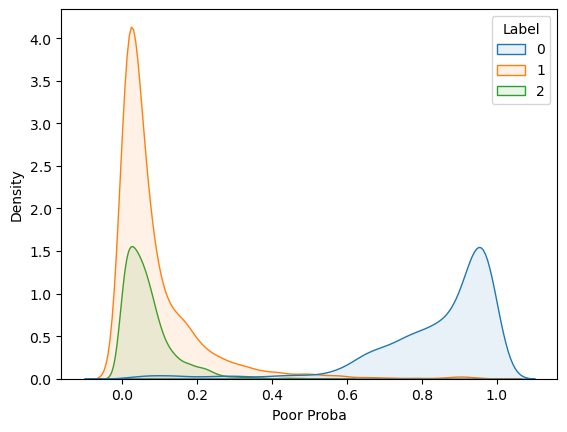

In [20]:
sns.kdeplot(data=final_df, x="Poor Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Poor Proba', ylabel='Density'>

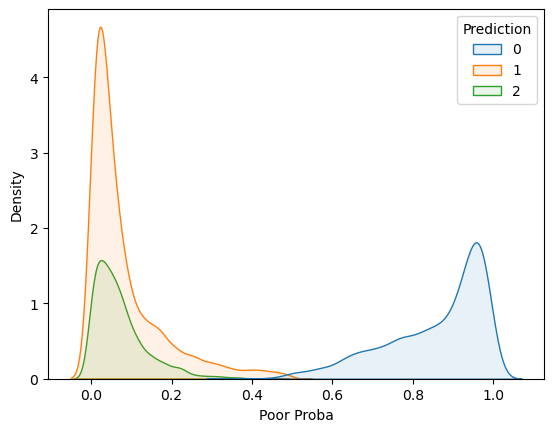

In [21]:
sns.kdeplot(data=final_df, x="Poor Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Standard Proba', ylabel='Density'>

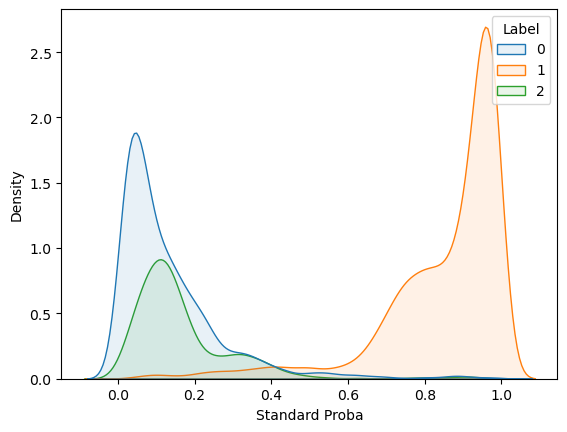

In [22]:
sns.kdeplot(data=final_df, x="Standard Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Standard Proba', ylabel='Density'>

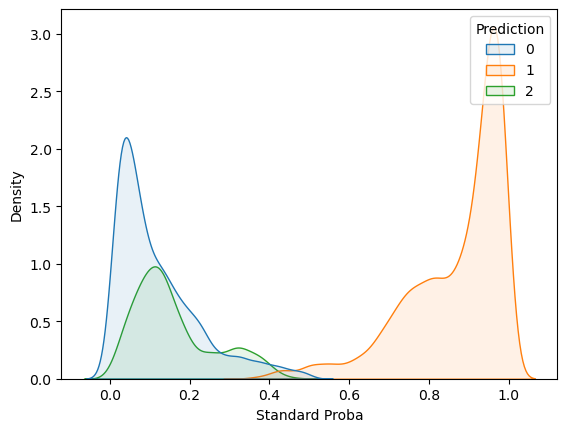

In [23]:
sns.kdeplot(data=final_df, x="Standard Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Good Proba', ylabel='Density'>

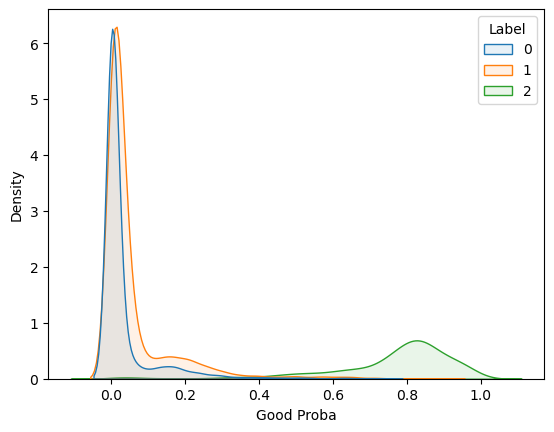

In [24]:
sns.kdeplot(data=final_df, x="Good Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Good Proba', ylabel='Density'>

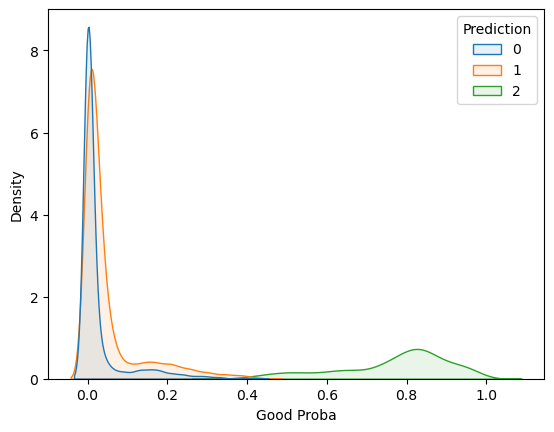

In [25]:
sns.kdeplot(data=final_df, x="Good Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Calibrated Proba for Good', ylabel='Density'>

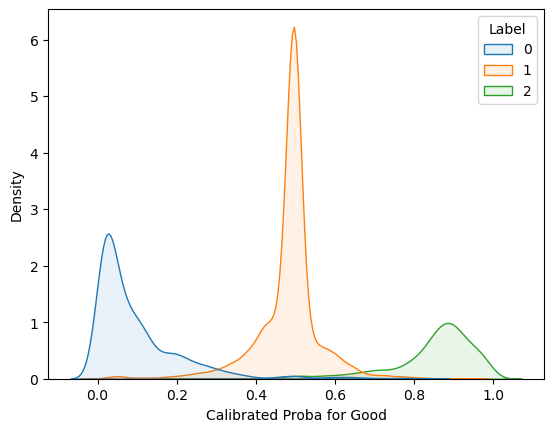

In [26]:
sns.kdeplot(data=final_df, x="Calibrated Proba for Good", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Calibrated Proba for Good', ylabel='Density'>

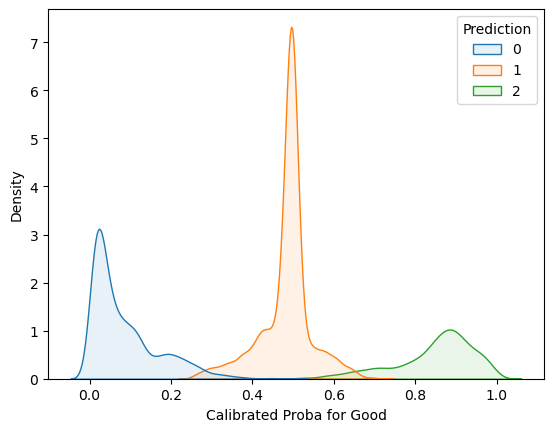

In [27]:
sns.kdeplot(data=final_df, x="Calibrated Proba for Good", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

In [28]:
from sklearn.calibration import CalibratedClassifierCV

In [29]:
cal_clf = CalibratedClassifierCV(model_gsv, method="sigmoid", cv="prefit")
cal_clf.fit(X_valid, y_valid)

CalibratedClassifierCV(cv='prefit',
                       estimator=GridSearchCV(cv=2,
                                              estimator=Pipeline(steps=[('dtf',
                                                                         <__main__.Data_Transformer object at 0x000001E58834E890>),
                                                                        ('rfc',
                                                                         RandomForestClassifier(class_weight='balanced',
                                                                                                n_jobs=-1))]),
                                              param_grid={'rfc__max_depth': [2,
                                                                             5,
                                                                             10,
                                                                             20,
                                                                             30,
                                                                             50,
                                                                             70,
                                                                             100,
                                                                             130,
                                                                             170,
                                                                             210],
                                                          'rfc__min_samples_leaf': [1,
                                                                                    2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    7,
                                                                                    10,
                                                                                    13,
                                                                                    17,
                                                                                    21,
                                                                                    26,
                                                                                    31]},
                                              scoring=make_scorer(custom_score_function)))

In [30]:
y_pred_proba = cal_clf.predict_proba(X)

In [31]:
final_df["Poor Proba"] = y_pred_proba[:,0]
final_df["Standard Proba"] = y_pred_proba[:,1]
final_df["Good Proba"] = y_pred_proba[:,2]

<Axes: xlabel='Poor Proba', ylabel='Density'>

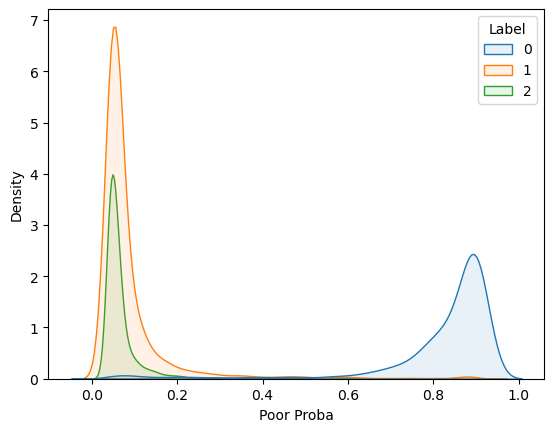

In [32]:
sns.kdeplot(data=final_df, x="Poor Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Poor Proba', ylabel='Density'>

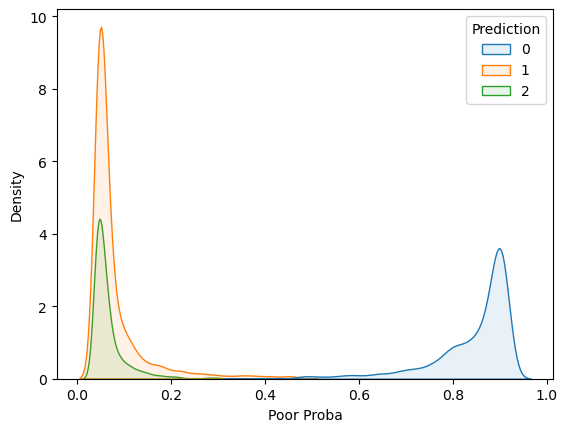

In [33]:
sns.kdeplot(data=final_df, x="Poor Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Standard Proba', ylabel='Density'>

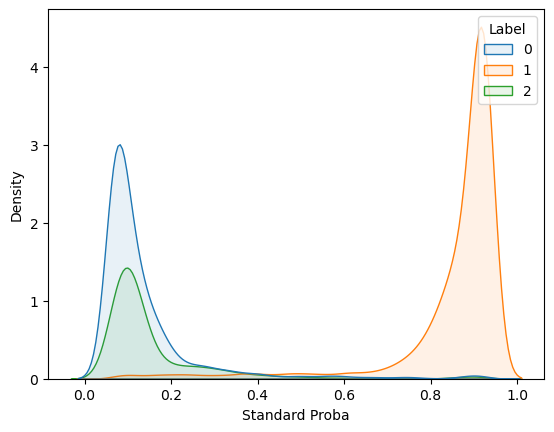

In [34]:
sns.kdeplot(data=final_df, x="Standard Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Standard Proba', ylabel='Density'>

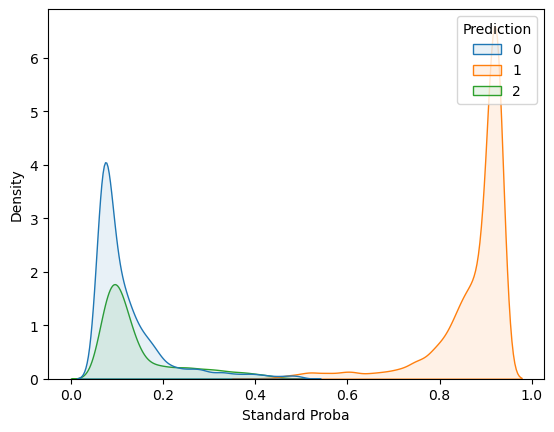

In [35]:
sns.kdeplot(data=final_df, x="Standard Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Good Proba', ylabel='Density'>

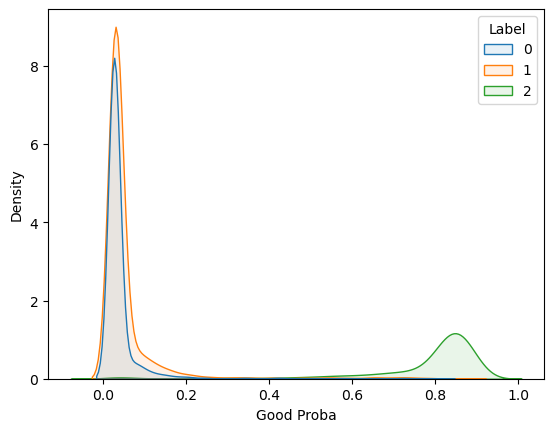

In [36]:
sns.kdeplot(data=final_df, x="Good Proba", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Good Proba', ylabel='Density'>

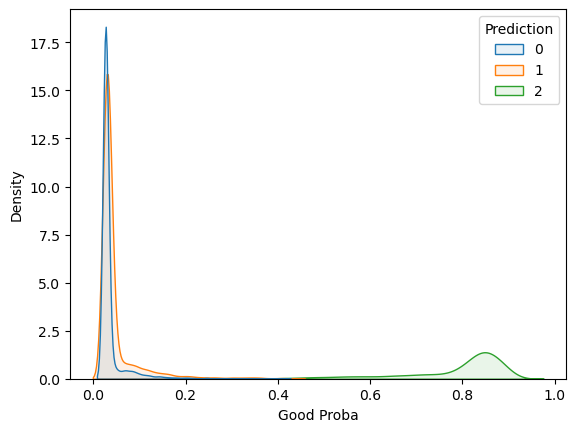

In [37]:
sns.kdeplot(data=final_df, x="Good Proba", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Calibrated Proba for Good', ylabel='Density'>

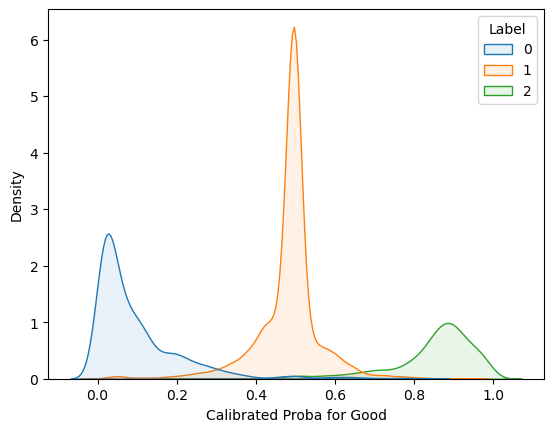

In [38]:
sns.kdeplot(data=final_df, x="Calibrated Proba for Good", hue="Label", palette="tab10", fill=True, alpha=0.1)

<Axes: xlabel='Calibrated Proba for Good', ylabel='Density'>

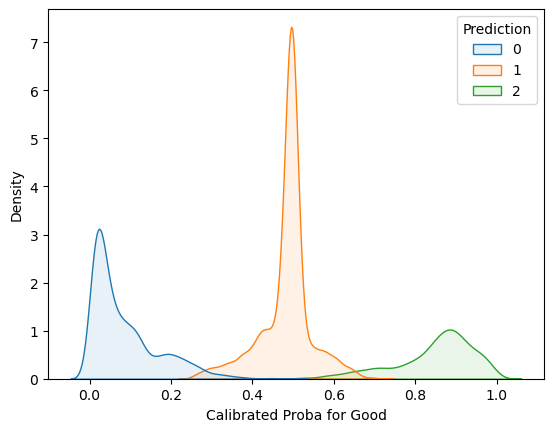

In [39]:
sns.kdeplot(data=final_df, x="Calibrated Proba for Good", hue="Prediction", palette="tab10", fill=True, alpha=0.1)

In [40]:
profit = np.where((final_df["Label"]==0)&(final_df["Prediction"]==0), 3.26*final_df["Annual Income"], 
                        np.where((final_df["Label"]==0)&(final_df["Prediction"]==1), 0.65*final_df["Annual Income"], 
                            np.where((final_df["Label"]==0)&(final_df["Prediction"]==2), -1.91*final_df["Annual Income"],
                                np.where((final_df["Label"]==1)&(final_df["Prediction"]==0), 1.73*final_df["Annual Income"],
                                    np.where((final_df["Label"]==1)&(final_df["Prediction"]==1), 3.71*final_df["Annual Income"],
                                        np.where((final_df["Label"]==1)&(final_df["Prediction"]==2), 0.66*final_df["Annual Income"],
                                            np.where((final_df["Label"]==2)&(final_df["Prediction"]==0), 0.24*final_df["Annual Income"],
                                                np.where((final_df["Label"]==2)&(final_df["Prediction"]==1), 0.67*final_df["Annual Income"],
                                                    np.where((final_df["Label"]==2)&(final_df["Prediction"]==2), 2.49*final_df["Annual Income"],0)))))))))
profit.sum()

2002715360.2476

In [41]:
decision_threshold_1 = 0.4
decision_threshold_2 = 0.8
final_df["Adjusted Prediction"] = np.where(final_df["Calibrated Proba for Good"]>decision_threshold_2, 2, np.where(final_df["Calibrated Proba for Good"]>decision_threshold_1, 1, 0))
final_df["Profit"] = np.where((final_df["Label"]==0)&(final_df["Adjusted Prediction"]==0), 3.26*final_df["Annual Income"], 
                        np.where((final_df["Label"]==0)&(final_df["Adjusted Prediction"]==1), 0.65*final_df["Annual Income"], 
                            np.where((final_df["Label"]==0)&(final_df["Adjusted Prediction"]==2), -1.91*final_df["Annual Income"],
                                np.where((final_df["Label"]==1)&(final_df["Adjusted Prediction"]==0), 1.73*final_df["Annual Income"],
                                    np.where((final_df["Label"]==1)&(final_df["Adjusted Prediction"]==1), 3.71*final_df["Annual Income"],
                                        np.where((final_df["Label"]==1)&(final_df["Adjusted Prediction"]==2), 0.66*final_df["Annual Income"],
                                            np.where((final_df["Label"]==2)&(final_df["Adjusted Prediction"]==0), 0.24*final_df["Annual Income"],
                                                np.where((final_df["Label"]==2)&(final_df["Adjusted Prediction"]==1), 0.67*final_df["Annual Income"],
                                                    np.where((final_df["Label"]==2)&(final_df["Adjusted Prediction"]==2), 2.49*final_df["Annual Income"],0)))))))))
final_df

,Poor Proba,Standard Proba,Good Proba,Prediction,Label,Annual Income,Calibrated Proba for Good,Adjusted Prediction,Profit
0,0.877123,0.096937,0.025940,0,0,30625.940,0.050000,0,99840.56440
1,0.043883,0.929263,0.026854,1,1,52312.680,0.495000,1,194080.04280
2,0.801595,0.125625,0.072781,0,0,113781.390,0.210000,0,370927.33140
3,0.056258,0.902284,0.041457,1,1,58918.470,0.505000,1,218587.52370
4,0.051064,0.793381,0.155555,1,1,98620.980,0.613049,1,365883.83580
...,...,...,...,...,...,...,...,...,...
12495,0.077088,0.862846,0.060066,1,1,17032.785,0.505000,1,63191.63235
12496,0.052437,0.920676,0.026887,1,1,25546.260,0.480000,1,94776.62460
12497,0.090763,0.863981,0.045256,1,1,117639.920,0.470000,1,436444.10320
12498,0.867107,0.106980,0.025913,0,0,60877.170,0.060000,0,198459.57420


In [42]:
final_df["Profit"].sum()

1963465163.15005

<Axes: xlabel='Calibrated Proba for Good', ylabel='Density'>

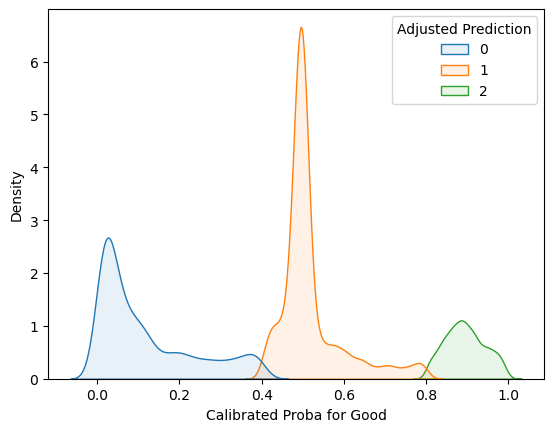

In [43]:
sns.kdeplot(data=final_df, x="Calibrated Proba for Good", hue="Adjusted Prediction", palette="tab10", fill=True, alpha=0.1)

In [44]:
decision_threshold_1 = []
decision_threshold_2 = []
total_profit = []
for ds1 in np.linspace(0, 1, 100):
    for ds2 in np.linspace(ds1, 1, 100):
        decision_threshold_1.append(ds1)
        decision_threshold_2.append(ds2)
        prediction = np.where(final_df["Calibrated Proba for Good"]>ds2, 2, np.where(final_df["Calibrated Proba for Good"]>ds1, 1, 0))
        profit = np.where((final_df["Label"]==0)&(prediction==0), 3.26*final_df["Annual Income"], 
                                np.where((final_df["Label"]==0)&(prediction==1), 0.65*final_df["Annual Income"], 
                                    np.where((final_df["Label"]==0)&(prediction==2), -1.91*final_df["Annual Income"],
                                        np.where((final_df["Label"]==1)&(prediction==0), 1.73*final_df["Annual Income"],
                                            np.where((final_df["Label"]==1)&(prediction==1), 3.71*final_df["Annual Income"],
                                                np.where((final_df["Label"]==1)&(prediction==2), 0.66*final_df["Annual Income"],
                                                    np.where((final_df["Label"]==2)&(prediction==0), 0.24*final_df["Annual Income"],
                                                        np.where((final_df["Label"]==2)&(prediction==1), 0.67*final_df["Annual Income"],
                                                            np.where((final_df["Label"]==2)&(prediction==2), 2.49*final_df["Annual Income"],0)))))))))
        total_profit.append(profit.sum())

In [45]:
profit_df = pd.DataFrame()
profit_df["Decision Threshold 1"]=decision_threshold_1
profit_df["Decision Threshold 2"]=decision_threshold_2
profit_df["Total Profit"]=total_profit

Text(0, 0.5, 'Decision Threshold 2')

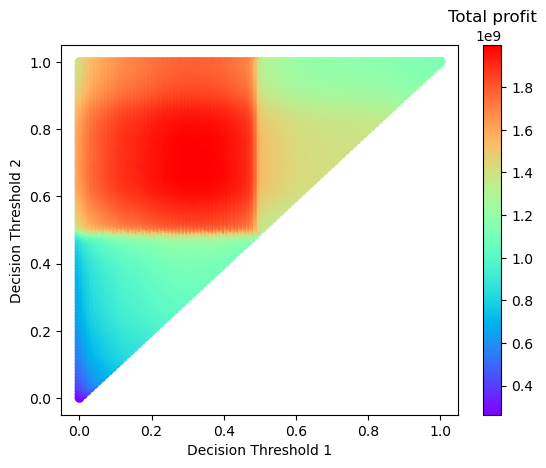

In [46]:
plt.scatter(x=decision_threshold_1,y=decision_threshold_2,c=total_profit,cmap='rainbow')
clb=plt.colorbar()
clb.ax.set_title('Total profit')
plt.xlabel('Decision Threshold 1')
plt.ylabel('Decision Threshold 2')

Text(0, 0.5, 'Decision Threshold 2')

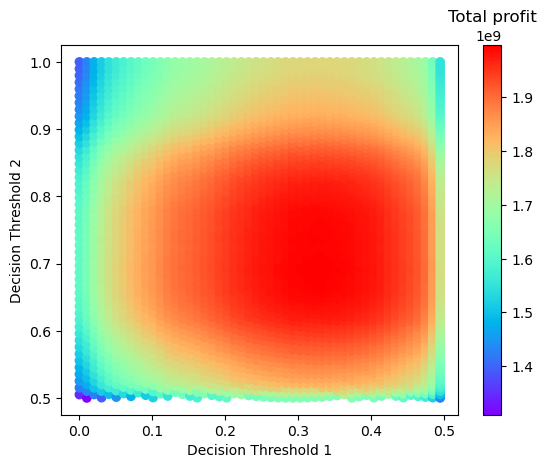

In [47]:
plt.scatter(x=profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Decision Threshold 1"],
            y=profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Decision Threshold 2"],
            c=profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Total Profit"], cmap='rainbow')
clb=plt.colorbar()
clb.ax.set_title('Total profit')
plt.xlabel('Decision Threshold 1')
plt.ylabel('Decision Threshold 2')

Text(0.5, 0, 'Total profit')

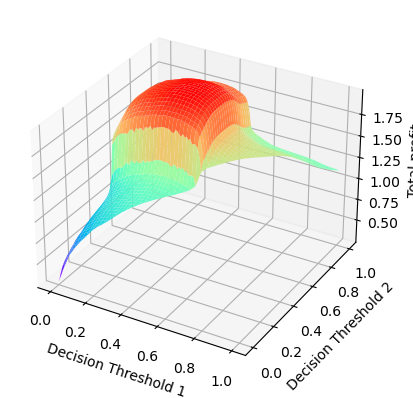

In [48]:
from scipy.interpolate import griddata

x=list(profit_df["Decision Threshold 1"])
y=list(profit_df["Decision Threshold 2"])
z=list(profit_df["Total Profit"])

xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xi, yi)

Z = griddata((x, y), z, (X, Y), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')

ax.set_xlabel('Decision Threshold 1')
ax.set_ylabel('Decision Threshold 2')
ax.set_zlabel('Total profit')

Text(0.5, 0, 'Total profit')

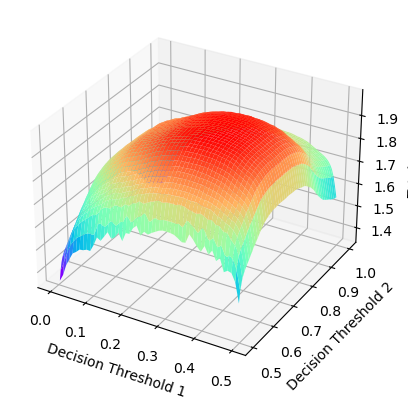

In [49]:
from scipy.interpolate import griddata

x=list(profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Decision Threshold 1"])
y=list(profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Decision Threshold 2"])
z=list(profit_df[(profit_df["Decision Threshold 1"]<=0.5)&(profit_df["Decision Threshold 2"]>=0.5)]["Total Profit"])

xi = np.linspace(0, 0.5, 100)
yi = np.linspace(0.5, 1, 100)
X, Y = np.meshgrid(xi, yi)

Z = griddata((x, y), z, (X, Y), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')

ax.set_xlabel('Decision Threshold 1')
ax.set_ylabel('Decision Threshold 2')
ax.set_zlabel('Total profit')

In [50]:
max_profit_index = z.index(max(z))
x[max_profit_index], y[max_profit_index], z[max_profit_index]

(0.33333333333333337, 0.696969696969697, 1997297087.0664499)